# Imports


In [13]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns


# 1.   Limpeza e Análise de Dados de Vendas

# Gerar um dataset de vendas com 50 registros simulados

In [14]:
# Gerar um dataset de vendas com 50 registros simulados
np.random.seed(42)  # Para resultados reprodutíveis

# Função para gerar datas dentro de um ano específico
def generate_dates(start_date, end_date, num_dates):
    start = datetime.strptime(start_date, "%d/%m/%Y")
    end = datetime.strptime(end_date, "%d/%m/%Y")
    delta = end - start
    return [start + timedelta(days=np.random.randint(0, delta.days)) for _ in range(num_dates)]

# Simulação de dados
data = {
    'ID': range(1, 51),
    'Data': generate_dates('01/01/2023', '31/12/2023', 50),
    'Produto': np.random.choice(['Produto A', 'Produto B', 'Produto C', 'Produto D'], size=50),
    'Categoria': np.random.choice(['Categoria 1', 'Categoria 2', 'Categoria 3'], size=50),
    'Quantidade': np.random.randint(1, 20, size=50),
    'Preço': np.random.uniform(10, 100, size=50).round(2)
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Introduzir alguns valores nulos e duplicados para simulação
df.loc[5, 'Quantidade'] = np.nan  # Valor faltante
df.loc[10, 'Preço'] = np.nan  # Valor faltante
df = pd.concat([df, df.iloc[[0]]], ignore_index=True)  # Duplicar a primeira linha

# Exibir o dataset original com valores faltantes e duplicados
print("Dataset original com valores faltantes e duplicados:")
print(df.head(), "\n")


Dataset original com valores faltantes e duplicados:
   ID       Data    Produto    Categoria  Quantidade  Preço
0   1 2023-04-13  Produto B  Categoria 1        14.0  37.08
1   2 2023-12-15  Produto B  Categoria 1         7.0  35.64
2   3 2023-09-28  Produto B  Categoria 2         9.0  13.32
3   4 2023-04-17  Produto A  Categoria 3        15.0  64.86
4   5 2023-03-13  Produto B  Categoria 1        15.0  55.24 



# Limpeza de dados


In [15]:
# Tratamento de valores faltantes: preencher com a média da coluna onde aplicável
df['Quantidade'] = df['Quantidade'].fillna(df['Quantidade'].mean())
df['Preço'] = df['Preço'].fillna(df['Preço'].mean())

# 2. Remover duplicatas
df.drop_duplicates(inplace=True)

# 3. Conversão de tipos de dados, se necessário
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# Exibir o dataset limpo
print("Dataset limpo:")
print(df.head(), "\n")

Dataset limpo:
   ID       Data    Produto    Categoria  Quantidade  Preço
0   1 2023-04-13  Produto B  Categoria 1        14.0  37.08
1   2 2023-12-15  Produto B  Categoria 1         7.0  35.64
2   3 2023-09-28  Produto B  Categoria 2         9.0  13.32
3   4 2023-04-17  Produto A  Categoria 3        15.0  64.86
4   5 2023-03-13  Produto B  Categoria 1        15.0  55.24 



In [33]:
df.isnull().sum() # Verificando qtd de items nulos nas tabelas (averiguandoq que a limpeza ocorreu bem)

,0
ID,0
Data,0
Produto,0
Categoria,0
Quantidade,0
Preço,0
Total_Vendas,0
Ano_Mes,0


In [32]:
# Salvar o dataset limpo em um arquivo CSV
df.to_csv('data_clean.csv', index=False)

# Análises

In [16]:
# Calcular o total de vendas (Quantidade * Preço) por produto
df['Total_Vendas'] = df['Quantidade'] * df['Preço']
total_vendas_por_produto = df.groupby('Produto')['Total_Vendas'].sum()

# Identificar o produto com o maior número de vendas totais
produto_maior_venda = total_vendas_por_produto.idxmax()
maior_venda = total_vendas_por_produto.max()

# Exibir resultados das análises
print("Total de vendas por produto:")
print(total_vendas_por_produto, "\n")

print(f"Produto com o maior número de vendas totais: {produto_maior_venda} com vendas totais de R${maior_venda:.2f}")


Total de vendas por produto:
Produto
Produto A    3023.7362
Produto B    9530.4300
Produto C    5056.3000
Produto D    8238.6608
Name: Total_Vendas, dtype: float64 

Produto com o maior número de vendas totais: Produto B com vendas totais de R$9530.43


# 2. Análise Exploratória de Dados de Vendas

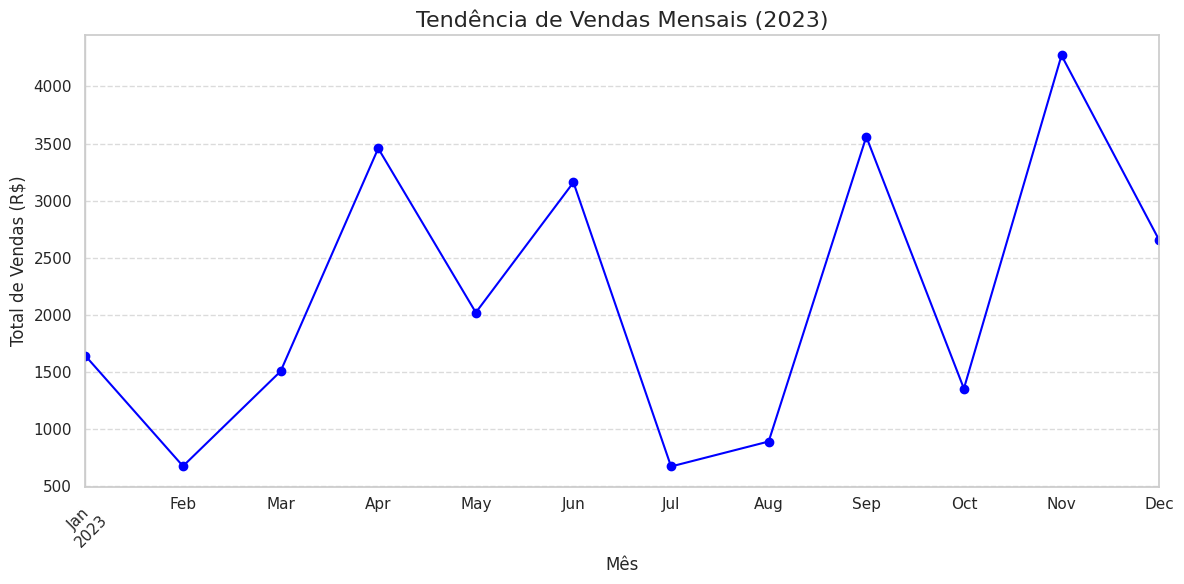


O mês com o MAIOR volume de vendas foi 2023-11, com um total de R$4272.45.

O mês com o MENOR volume de vendas foi 2023-07, com um total de R$669.73.


In [20]:

# Gerar dataset de vendas para reconstruir o ambiente
np.random.seed(42)

def generate_dates(start_date, end_date, num_dates):
    start = datetime.strptime(start_date, "%d/%m/%Y")
    end = datetime.strptime(end_date, "%d/%m/%Y")
    delta = end - start
    return [start + timedelta(days=np.random.randint(0, delta.days)) for _ in range(num_dates)]

data = {
    'ID': range(1, 51),
    'Data': generate_dates('01/01/2023', '31/12/2023', 50),
    'Produto': np.random.choice(['Produto A', 'Produto B', 'Produto C', 'Produto D'], size=50),
    'Categoria': np.random.choice(['Categoria 1', 'Categoria 2', 'Categoria 3'], size=50),
    'Quantidade': np.random.randint(1, 20, size=50),
    'Preço': np.random.uniform(10, 100, size=50).round(2)
}

df = pd.DataFrame(data)
df.loc[5, 'Quantidade'] = np.nan
df.loc[10, 'Preço'] = np.nan
df = pd.concat([df, df.iloc[[0]]], ignore_index=True)
df['Quantidade'] = df['Quantidade'].fillna(df['Quantidade'].mean())
df['Preço'] = df['Preço'].fillna(df['Preço'].mean())
df.drop_duplicates(inplace=True)
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')
df['Total_Vendas'] = df['Quantidade'] * df['Preço']

# Configurar o estilo do Seaborn
sns.set_theme(style="whitegrid")

# Adicionar colunas de ano e mês para análise mensal
df['Ano_Mes'] = df['Data'].dt.to_period('M')

# Tendência de vendas ao longo do tempo (mensal)
tendencia_vendas = df.groupby('Ano_Mes')['Total_Vendas'].sum()

# Criar o gráfico de linha
plt.figure(figsize=(12, 6))
tendencia_vendas.plot(kind='line', marker='o', color='blue')
plt.title('Tendência de Vendas Mensais (2023)', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Total de Vendas (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('tendencia_vendas.png')  # Salvar o gráfico
plt.show()

# Identificar padrões ou insights
# 1. Mês com maior volume de vendas
mes_maior_venda = tendencia_vendas.idxmax()
valor_maior_venda = tendencia_vendas.max()

# 2. Mês com menor volume de vendas
mes_menor_venda = tendencia_vendas.idxmin()
valor_menor_venda = tendencia_vendas.min()

# Exibir os insights
print()
print(f"O mês com o MAIOR volume de vendas foi {mes_maior_venda}, com um total de R${valor_maior_venda:.2f}.")
print()
print(f"O mês com o MENOR volume de vendas foi {mes_menor_venda}, com um total de R${valor_menor_venda:.2f}.")


# Outros insights interessantes que  eu considero ter

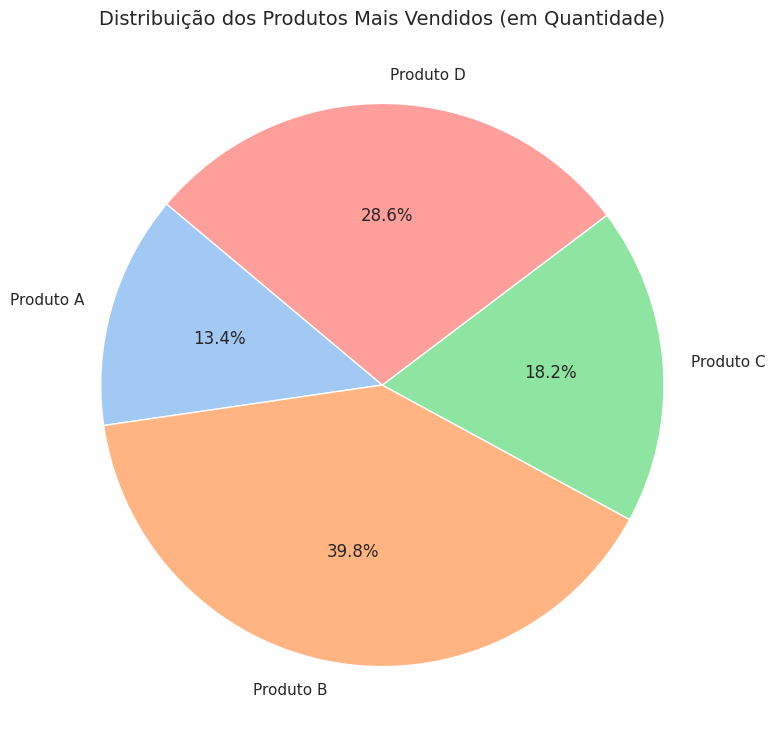

In [26]:
# Gráfico de pizza dos produtos mais vendidos
vendas_por_produto = df.groupby('Produto')['Quantidade'].sum()

# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
vendas_por_produto.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribuição dos Produtos Mais Vendidos (em Quantidade)', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

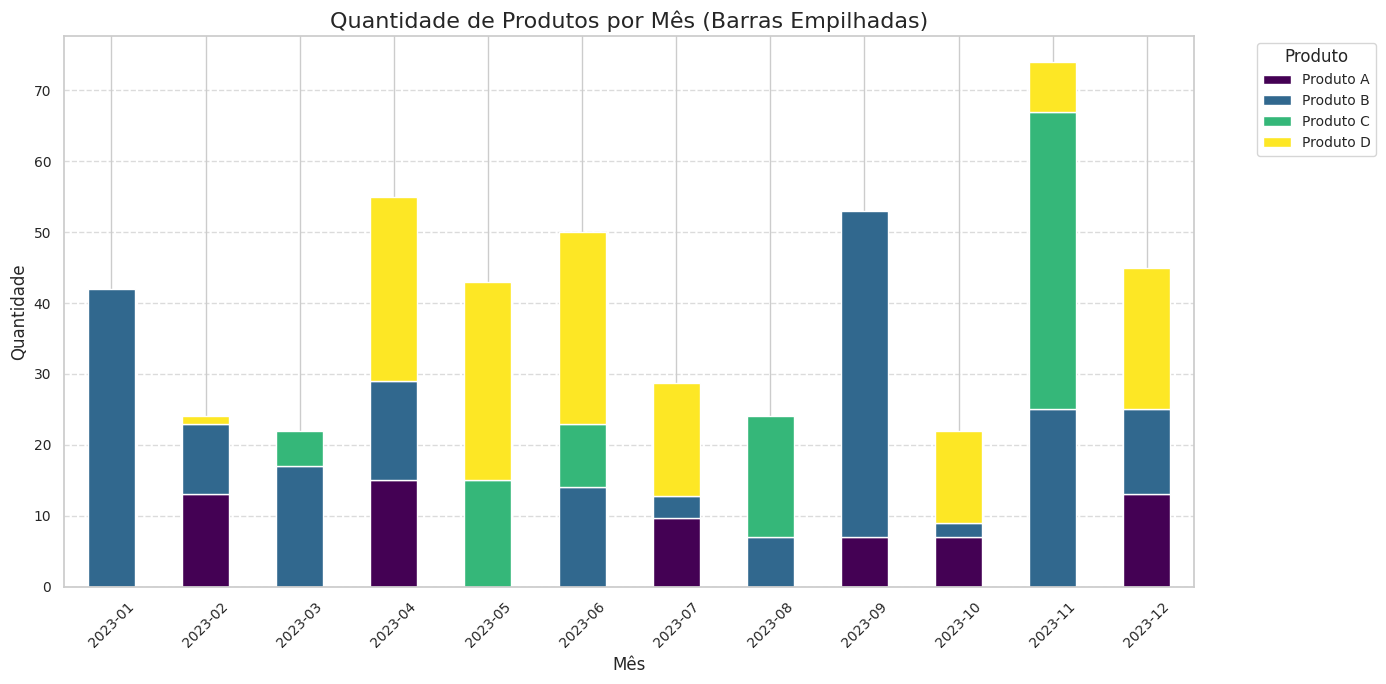

In [35]:
grouped_data = df.groupby(['Ano_Mes', 'Produto'])['Quantidade'].sum().unstack(fill_value=0)

# Now 'grouped_data_filled' is defined and can be used for plotting
grouped_data_filled = grouped_data

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(14, 7))
grouped_data_filled.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')

# Ajustes de título e rótulos
plt.title('Quantidade de Produtos por Mês (Barras Empilhadas)', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Produto', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()